In [1]:
import os
import sys
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from database import DB
from analysis import MLP, xyFeature
from analysis.feature import past_feature, win_sum_feature, cum_win_sum_feature, cum_opp_win_rate_feature, normal

In [2]:
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)

In [3]:
db = DB()
db.initialise()

temp_df = db.get_table('view_set_match_info_concat')

In [4]:
col_to_use = ['league_name', 'year', 'season', 'date', 'set_number', 
              'team_1', 'team_2', 'corresponding_team',
              'wdl', 'side', 'game_length','team_kills',
              'team_deaths','team_baron_kills', 'team_dragon_kills',
              'team_rift_kills', 'team_tower_kills', 'team_inhib_kills',
             'team_total_gold', 'team_minion_kills']
df = temp_df[col_to_use]
df = df.dropna(subset=col_to_use)
df['date'] = pd.to_datetime(df['date'])

In [5]:
gamelength_norm_cols = ['team_kills',
 'team_deaths','team_baron_kills',
 'team_dragon_kills','team_rift_kills',
 'team_total_gold','team_minion_kills']

min_max_cols = ['team_tower_kills', 'team_inhib_kills']

df[gamelength_norm_cols] = normal(df, gamelength_norm_cols, 'game_length')
df[min_max_cols] = normal(df, min_max_cols, 'minmax')

In [6]:
df = past_feature(df, gamelength_norm_cols+min_max_cols, game_past=3)

In [7]:
df = win_sum_feature(df, rolling_window=3)

In [8]:
df = cum_win_sum_feature(df)

In [9]:
df = cum_opp_win_rate_feature(df)

In [10]:
df

,league_name,year,season,date,set_number,team_1,team_2,corresponding_team,wdl,side,game_length,team_kills,team_deaths,team_baron_kills,team_dragon_kills,team_rift_kills,team_tower_kills,team_inhib_kills,team_total_gold,team_minion_kills,team_kills__1,team_deaths__1,team_baron_kills__1,team_dragon_kills__1,team_rift_kills__1,team_total_gold__1,team_minion_kills__1,team_tower_kills__1,team_inhib_kills__1,team_kills__2,team_deaths__2,team_baron_kills__2,team_dragon_kills__2,team_rift_kills__2,team_total_gold__2,team_minion_kills__2,team_tower_kills__2,team_inhib_kills__2,team_kills__3,team_deaths__3,team_baron_kills__3,team_dragon_kills__3,team_rift_kills__3,team_total_gold__3,team_minion_kills__3,team_tower_kills__3,team_inhib_kills__3,win_sum__3,cum_win_sum,opp_team,cum_opp_win_rate
0,BL,2020,spring,2020-01-21,1,Brussels Guardians,RSCA,Brussels Guardians,L,red,1539.0,0.116959,0.662768,0.000000,0.000000,0.000000,0.090909,0.0000,1512.670565,25.380117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RSCA,NaN
1,BL,2020,spring,2020-03-12,1,Brussels Guardians,RSCA,Brussels Guardians,W,red,1541.0,1.012330,0.233615,0.000000,0.155743,0.038936,0.636364,0.1250,1837.767683,19.195328,0.797342,1.036545,0.000000,0.079734,0.000000,1714.285714,18.657807,0.090909,0.0000,0.575758,0.121212,0.060606,0.060606,0.060606,1800.000000,22.151515,0.545455,0.0625,0.336735,0.673469,0.000000,0.030612,0.000000,1597.959184,24.673469,0.272727,0.0000,1.0,2.0,RSCA,0.000000
2,BL,2020,summer,2020-06-09,1,Brussels Guardians,RSCA,Brussels Guardians,W,red,2342.0,0.768574,0.204953,0.025619,0.076857,0.025619,0.909091,0.1875,1808.710504,21.673783,0.087591,0.496350,0.000000,0.029197,0.058394,1407.299270,22.248175,0.000000,0.0000,0.079947,0.719520,0.000000,0.000000,0.000000,1407.061959,25.063291,0.090909,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RSCA,0.500000
3,BL,2020,summer,2020-07-07,1,Brussels Guardians,RSCA,Brussels Guardians,L,blue,2273.0,0.316762,0.580730,0.000000,0.026397,0.026397,0.454545,0.0000,1763.308403,26.132864,0.147965,0.591862,0.000000,0.000000,0.036991,1505.548705,24.044390,0.272727,0.0000,0.419314,0.838628,0.000000,0.114358,0.000000,1459.974587,20.851334,0.000000,0.0000,0.325834,0.512025,0.023274,0.046548,0.023274,1717.610551,24.833204,0.454545,0.0625,0.0,2.0,RSCA,0.666667
4,BL,2020,spring,2020-01-21,1,Brussels Guardians,KV Mechelen,Brussels Guardians,W,blue,2119.0,0.736196,0.254837,0.056630,0.113261,0.028315,1.000000,0.1875,1950.920245,25.795186,0.116959,0.662768,0.000000,0.000000,0.000000,1512.670565,25.380117,0.090909,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,KV Mechelen,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23459,VCS,2020,summer,2020-07-18,2,OverPower Esports,Percent Esports,Percent Esports,W,blue,1689.0,0.852575,0.497336,0.035524,0.106572,0.071048,0.727273,0.0625,2003.587922,23.836590,0.038911,0.622568,0.000000,0.000000,0.038911,1449.688716,27.782101,0.000000,0.0000,0.231023,0.726073,0.000000,0.000000,0.000000,1557.524752,25.280528,0.090909,0.0000,0.392299,0.435888,0.021794,0.087178,0.000000,1719.840174,23.603342,0.727273,0.0000,1.0,5.0,OverPower Esports,NaN
23460,VCS,2020,summer,2020-07-18,3,OverPower Esports,Percent Esports,Percent Esports,W,red,1503.0,0.518962,0.079840,0.000000,0.119760,0.039920,0.727273,0.0625,1900.838323,28.502994,0.852575,0.497336,0.035524,0.106572,0.071048,2003.587922,23.836590,0.727273,0.0625,0.038911,0.622568,0.000000,0.000000,0.038911,1449.688716,27.782101,0.000000,0.0000,0.231023,0.726073,0.000000,0.000000,0.000000,1557.524752,25.280528,0.090909,0.0000,0.0,6.0,OverPower Esports,1.000000
23461,VCS,2020,summer,2020-07-18,1,OverPower Esports,Percent Esports,Percent Esports,L,red,1759.0,0.545765,0.648096,0.068221,0.034110,0.000000,0.0909

In [12]:
df = df.dropna()
df

,league_name,year,season,date,set_number,team_1,team_2,corresponding_team,wdl,side,game_length,team_kills,team_deaths,team_baron_kills,team_dragon_kills,team_rift_kills,team_tower_kills,team_inhib_kills,team_total_gold,team_minion_kills,team_kills__1,team_deaths__1,team_baron_kills__1,team_dragon_kills__1,team_rift_kills__1,team_total_gold__1,team_minion_kills__1,team_tower_kills__1,team_inhib_kills__1,team_kills__2,team_deaths__2,team_baron_kills__2,team_dragon_kills__2,team_rift_kills__2,team_total_gold__2,team_minion_kills__2,team_tower_kills__2,team_inhib_kills__2,team_kills__3,team_deaths__3,team_baron_kills__3,team_dragon_kills__3,team_rift_kills__3,team_total_gold__3,team_minion_kills__3,team_tower_kills__3,team_inhib_kills__3,win_sum__3,cum_win_sum,opp_team,cum_opp_win_rate
1,BL,2020,spring,2020-03-12,1,Brussels Guardians,RSCA,Brussels Guardians,W,red,1541.0,1.012330,0.233615,0.000000,0.155743,0.038936,0.636364,0.1250,1837.767683,19.195328,0.797342,1.036545,0.000000,0.079734,0.000000,1714.285714,18.657807,0.090909,0.0000,0.575758,0.121212,0.060606,0.060606,0.060606,1800.000000,22.151515,0.545455,0.0625,0.336735,0.673469,0.000000,0.030612,0.000000,1597.959184,24.673469,0.272727,0.0000,1.0,2.0,RSCA,0.000000
3,BL,2020,summer,2020-07-07,1,Brussels Guardians,RSCA,Brussels Guardians,L,blue,2273.0,0.316762,0.580730,0.000000,0.026397,0.026397,0.454545,0.0000,1763.308403,26.132864,0.147965,0.591862,0.000000,0.000000,0.036991,1505.548705,24.044390,0.272727,0.0000,0.419314,0.838628,0.000000,0.114358,0.000000,1459.974587,20.851334,0.000000,0.0000,0.325834,0.512025,0.023274,0.046548,0.023274,1717.610551,24.833204,0.454545,0.0625,0.0,2.0,RSCA,0.666667
5,BL,2020,spring,2020-03-12,1,Brussels Guardians,KV Mechelen,Brussels Guardians,L,red,2162.0,0.222017,0.555042,0.000000,0.027752,0.055504,0.272727,0.0000,1526.364477,20.758557,1.012330,0.233615,0.000000,0.155743,0.038936,1837.767683,19.195328,0.636364,0.1250,0.797342,1.036545,0.000000,0.079734,0.000000,1714.285714,18.657807,0.090909,0.0000,0.575758,0.121212,0.060606,0.060606,0.060606,1800.000000,22.151515,0.545455,0.0625,1.0,3.0,KV Mechelen,1.000000
6,BL,2020,summer,2020-06-23,1,Brussels Guardians,KV Mechelen,Brussels Guardians,L,red,2578.0,0.325834,0.512025,0.023274,0.046548,0.023274,0.454545,0.0625,1717.610551,24.833204,0.316790,0.126716,0.031679,0.126716,0.000000,1650.475185,24.202746,0.545455,0.0625,0.768574,0.204953,0.025619,0.076857,0.025619,1808.710504,21.673783,0.909091,0.1875,0.087591,0.496350,0.000000,0.029197,0.058394,1407.299270,22.248175,0.000000,0.0000,2.0,2.0,KV Mechelen,0.500000
7,BL,2020,summer,2020-07-21,1,Brussels Guardians,KV Mechelen,Brussels Guardians,L,blue,1951.0,0.153767,0.399795,0.000000,0.030753,0.030753,0.090909,0.0000,1503.844182,25.955920,0.251836,0.566632,0.000000,0.000000,0.062959,1633.788038,23.830010,0.454545,0.0000,0.316762,0.580730,0.000000,0.026397,0.026397,1763.308403,26.132864,0.454545,0.0000,0.147965,0.591862,0.000000,0.000000,0.036991,1505.548705,24.044390,0.272727,0.0000,0.0,2.0,KV Mechelen,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,VCS,2020,summer,2020-08-13,2,EVOS Esports,Percent Esports,Percent Esports,L,blue,1419.0,0.253700,0.930233,0.000000,0.042283,0.042283,0.000000,0.0000,1539.957717,25.327696,0.294921,0.393228,0.000000,0.032769,0.000000,1730.464227,27.263790,0.272727,0.0000,0.186916,0.467290,0.000000,0.062305,0.031153,1721.619938,28.348910,0.272727,0.0000,0.127932,0.230277,0.000000,0.051173,0.000000,1605.646055,25.279318,0.454545,0.0000,0.0,10.0,EVOS Esports,0.000000
23460,VCS,2020,summer,2020-07-18,3,OverPower Esports,Percent Esports,Percent Esports,W,red,1503.0,0.518962,0.079840,0.000000,0.119760,0.039920,0.727273,0.0625,1900.838323,28.502994,0.852575,0.497336,0.035524,0.106572,0.071048,2003.587922,23.836590,0.727273,0.0625,0.038911,0.622568,0.000000,0.00000

In [13]:
drop_cols = ['league_name', 'year', 'season', 'date', 'set_number', 
             'team_1', 'team_2' ,'corresponding_team', 'game_length',
            'opp_team', 'team_kills', 'team_deaths', 'team_baron_kills', 
            'team_dragon_kills', 'team_rift_kills', 'team_total_gold',
            'team_minion_kills', 'team_tower_kills', 'team_inhib_kills']
cat_cols = ['side']

y_col = ['wdl']

cont_cols = list(set(list(df.columns)) - set(drop_cols) - set(cat_cols) - set(y_col))

In [14]:
cont_cols

['team_dragon_kills__2',
 'team_kills__1',
 'team_deaths__3',
 'team_dragon_kills__1',
 'team_deaths__2',
 'team_kills__2',
 'team_dragon_kills__3',
 'team_minion_kills__3',
 'team_inhib_kills__2',
 'team_minion_kills__2',
 'team_baron_kills__1',
 'team_tower_kills__2',
 'team_deaths__1',
 'team_baron_kills__3',
 'team_inhib_kills__3',
 'team_rift_kills__1',
 'team_total_gold__1',
 'team_inhib_kills__1',
 'team_rift_kills__3',
 'team_kills__3',
 'team_total_gold__2',
 'team_minion_kills__1',
 'team_tower_kills__3',
 'win_sum__3',
 'cum_win_sum',
 'team_baron_kills__2',
 'team_total_gold__3',
 'cum_opp_win_rate',
 'team_rift_kills__2',
 'team_tower_kills__1']

In [15]:
xy = xyFeature(df, cat_cols, cont_cols, y_col)
cats, conts, y = xy.prepare_XY()
emb_szs, n_cont, out_sz = xy.get_size()

In [16]:
torch.manual_seed(9)
model = MLP(emb_szs, n_cont, out_sz, [200, 100], p=0.5)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [17]:
#batch_size = temp_df.shape[0]
train_size = df[df['year']!=2020].shape[0]
val_size = df[df['year']==2020].shape[0] // 2
test_size = df[df['year']==2020].shape[0] // 2

cat_train = cats[:train_size]
con_train = conts[:train_size]
y_train = y[:train_size]

cat_valid = cats[train_size: train_size+val_size]
con_valid = conts[train_size: train_size+val_size]
y_valid = y[train_size: train_size+val_size]

cat_test = cats[train_size+val_size: train_size+val_size+test_size]
con_test = conts[train_size+val_size: train_size+val_size+test_size]
y_test = y[train_size+val_size: train_size+val_size+test_size]

In [18]:
print(train_size, val_size, test_size)

13008 2446 2446


In [29]:
import time
start_time = time.time()

epochs = 1000
costs = []

for epoch in range(epochs):
    y_pred = model.forward(cat_train, con_train)
    cost = criterion(y_pred, y_train)
    costs.append(cost)
    
    if epoch % 100 == 0:
        print(f'epoch: {epoch}, cost: {cost:.8f}')
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print(f'Duration: {(time.time() - start_time):.0f} seconds')

epoch: 0, cost: 0.56852990
epoch: 100, cost: 0.56639123
epoch: 200, cost: 0.56318969
epoch: 300, cost: 0.55971527
epoch: 400, cost: 0.55636418
epoch: 500, cost: 0.55845708
epoch: 600, cost: 0.55204713
epoch: 700, cost: 0.55124569
epoch: 800, cost: 0.54939985
epoch: 900, cost: 0.54661530
Duration: 319 seconds


Text(0.5, 0, 'epoch')

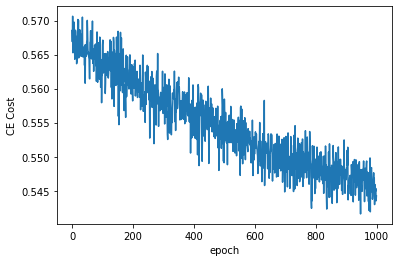

In [30]:
plt.plot(range(epochs), costs)
plt.ylabel('CE Cost')
plt.xlabel('epoch')

In [31]:
with torch.no_grad():
    y_pred = model(cat_test, con_test)
    cost = criterion(y_pred, y_test)
print(f'Cross Entropy Loss: {cost:.8f}')
    

Cross Entropy Loss: 0.70472366


In [32]:
rows = 2000
correct = 0
print(f'{"Model output":36} ARGMAX    Y_test')
for i in range(rows):
    print(f'{str(y_pred[i]):36}  {y_pred[i].argmax():^7}{y_test[i]:^7}')
    if y_pred[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')


Model output                         ARGMAX    Y_test
tensor([0.1551, 0.8449])                 1      0   
tensor([9.9996e-01, 4.1778e-05])         0      0   
tensor([0.1961, 0.8039])                 1      1   
tensor([9.9998e-01, 1.6922e-05])         0      0   
tensor([0.3835, 0.6165])                 1      1   
tensor([9.9995e-01, 5.3011e-05])         0      0   
tensor([0.7547, 0.2453])                 0      1   
tensor([0.0046, 0.9954])                 1      0   
tensor([0.1315, 0.8685])                 1      1   
tensor([0.8187, 0.1813])                 0      1   
tensor([0.0030, 0.9970])                 1      0   
tensor([0.2549, 0.7451])                 1      0   
tensor([1.0000e+00, 1.2411e-09])         0      1   
tensor([0.9286, 0.0714])                 0      1   
tensor([0.0021, 0.9979])                 1      1   
tensor([0.4322, 0.5678])                 1      1   
tensor([0.2175, 0.7825])                 1      0   
tensor([2.2162e-04, 9.9978e-01])         1   

tensor([0.0088, 0.9912])                 1      0   
tensor([1.0000e+00, 4.8671e-12])         0      0   
tensor([1.0000e+00, 2.0133e-06])         0      0   
tensor([0.3820, 0.6180])                 1      0   
tensor([1.0000e+00, 8.0310e-09])         0      0   
tensor([0.0034, 0.9966])                 1      1   
tensor([0.8444, 0.1556])                 0      1   
tensor([0.0075, 0.9925])                 1      0   
tensor([0.9914, 0.0086])                 0      1   
tensor([0.6448, 0.3552])                 0      1   
tensor([1.0000e+00, 3.4735e-06])         0      1   
tensor([0.7595, 0.2405])                 0      1   
tensor([8.7585e-04, 9.9912e-01])         1      0   
tensor([0.4136, 0.5864])                 1      1   
tensor([0.9980, 0.0020])                 0      0   
tensor([9.9988e-01, 1.1636e-04])         0      0   
tensor([0.2169, 0.7831])                 1      0   
tensor([1.0000e+00, 1.4028e-06])         0      1   
tensor([0.0012, 0.9988])                 1    

tensor([9.9980e-01, 1.9795e-04])         0      0   
tensor([0.8941, 0.1059])                 0      0   
tensor([1.0000e+00, 5.5572e-13])         0      0   
tensor([1.0000e+00, 2.7199e-08])         0      0   
tensor([0.1106, 0.8894])                 1      0   
tensor([0.0348, 0.9652])                 1      0   
tensor([0.2279, 0.7721])                 1      1   
tensor([0.3809, 0.6191])                 1      0   
tensor([9.9987e-01, 1.2983e-04])         0      0   
tensor([1.3081e-06, 1.0000e+00])         1      0   
tensor([0.0054, 0.9946])                 1      1   
tensor([0.9574, 0.0426])                 0      0   
tensor([9.9999e-01, 1.0114e-05])         0      0   
tensor([1.0000e+00, 5.1601e-12])         0      0   
tensor([0.0022, 0.9978])                 1      0   
tensor([0.6011, 0.3989])                 0      1   
tensor([0.0359, 0.9641])                 1      1   
tensor([0.9864, 0.0136])                 0      0   
tensor([0.4499, 0.5501])                 1    

tensor([0.9731, 0.0269])                 0      0   
tensor([0.1329, 0.8671])                 1      1   
tensor([0.3157, 0.6843])                 1      0   
tensor([0.9957, 0.0043])                 0      0   
tensor([0.8479, 0.1521])                 0      0   
tensor([9.9942e-01, 5.7615e-04])         0      1   
tensor([0.9936, 0.0064])                 0      0   
tensor([1.0000e+00, 2.3379e-06])         0      1   
tensor([1.0000e+00, 5.2813e-09])         0      0   
tensor([0.1017, 0.8983])                 1      0   
tensor([0.9422, 0.0578])                 0      0   
tensor([0.0257, 0.9743])                 1      0   
tensor([1.0000e+00, 1.2755e-09])         0      0   
tensor([0.0537, 0.9463])                 1      1   
tensor([1.6030e-08, 1.0000e+00])         1      1   
tensor([0.6477, 0.3523])                 0      1   
tensor([0.1993, 0.8007])                 1      0   
tensor([1.0000e+00, 1.1279e-24])         0      0   
tensor([0.9926, 0.0074])                 0    

tensor([7.2477e-10, 1.0000e+00])         1      0   
tensor([0.4230, 0.5770])                 1      1   
tensor([0.9988, 0.0012])                 0      1   
tensor([3.0256e-06, 1.0000e+00])         1      0   
tensor([0.2342, 0.7658])                 1      0   
tensor([9.9997e-01, 3.1604e-05])         0      0   
tensor([0.7934, 0.2066])                 0      0   
tensor([0.0340, 0.9660])                 1      0   
tensor([9.9929e-01, 7.0832e-04])         0      1   
tensor([0.7828, 0.2172])                 0      1   
tensor([0.2290, 0.7710])                 1      1   
tensor([1.0000e+00, 9.6790e-13])         0      0   
tensor([0.0761, 0.9239])                 1      0   
tensor([9.9998e-01, 2.2517e-05])         0      0   
tensor([1.0000e+00, 2.5981e-10])         0      0   
tensor([1.0000e+00, 5.7524e-08])         0      0   
tensor([0.0981, 0.9019])                 1      0   
tensor([0.9943, 0.0057])                 0      0   
tensor([0.9924, 0.0076])                 0    

tensor([4.1615e-06, 1.0000e+00])         1      1   
tensor([0.0047, 0.9953])                 1      0   
tensor([0.1083, 0.8917])                 1      1   
tensor([0.6454, 0.3546])                 0      1   
tensor([3.6975e-05, 9.9996e-01])         1      1   
tensor([3.3908e-08, 1.0000e+00])         1      1   
tensor([0.1855, 0.8145])                 1      1   
tensor([9.2338e-09, 1.0000e+00])         1      1   
tensor([0.0637, 0.9363])                 1      1   
tensor([0.9447, 0.0553])                 0      1   
tensor([0.0152, 0.9848])                 1      1   
tensor([0.0251, 0.9749])                 1      1   
tensor([0.4995, 0.5005])                 1      0   
tensor([0.9705, 0.0295])                 0      1   
tensor([0.1662, 0.8338])                 1      1   
tensor([0.9981, 0.0019])                 0      1   
tensor([0.0011, 0.9989])                 1      1   
tensor([0.9424, 0.0576])                 0      1   
tensor([4.5922e-04, 9.9954e-01])         1    

tensor([8.9677e-05, 9.9991e-01])         1      0   
tensor([0.8165, 0.1835])                 0      0   
tensor([0.9980, 0.0020])                 0      1   
tensor([9.9981e-01, 1.9320e-04])         0      0   
tensor([9.9971e-01, 2.9117e-04])         0      0   
tensor([1.0000e+00, 3.9260e-06])         0      0   
tensor([0.1752, 0.8248])                 1      0   
tensor([0.9111, 0.0889])                 0      0   
tensor([9.9925e-01, 7.4964e-04])         0      0   
tensor([1.0000e+00, 3.7087e-15])         0      0   
tensor([0.5622, 0.4378])                 0      1   
tensor([1.0000e+00, 2.4122e-06])         0      0   
tensor([1.0000e+00, 4.1538e-06])         0      0   
tensor([0.8266, 0.1734])                 0      0   
tensor([0.9986, 0.0014])                 0      1   
tensor([0.1255, 0.8745])                 1      0   
tensor([0.6620, 0.3380])                 0      0   
tensor([8.0585e-04, 9.9919e-01])         1      1   
tensor([0.9418, 0.0582])                 0    

tensor([0.0034, 0.9966])                 1      0   
tensor([3.8907e-04, 9.9961e-01])         1      1   
tensor([0.9955, 0.0045])                 0      0   
tensor([0.0182, 0.9818])                 1      0   
tensor([0.9847, 0.0153])                 0      1   
tensor([9.9947e-01, 5.3363e-04])         0      0   
tensor([0.0940, 0.9060])                 1      1   
tensor([3.9105e-11, 1.0000e+00])         1      1   
tensor([1.5500e-06, 1.0000e+00])         1      1   
tensor([2.4505e-05, 9.9998e-01])         1      0   
tensor([6.3110e-04, 9.9937e-01])         1      0   
tensor([0.9774, 0.0226])                 0      1   
tensor([4.0696e-04, 9.9959e-01])         1      1   
tensor([1.0218e-09, 1.0000e+00])         1      0   
tensor([2.7082e-04, 9.9973e-01])         1      1   
tensor([0.0197, 0.9803])                 1      0   
tensor([0.0563, 0.9437])                 1      1   
tensor([4.1507e-08, 1.0000e+00])         1      0   
tensor([1.0000e+00, 3.2469e-07])         0    